In [3]:
import numpy as np
import pandas as pd
import geopandas as gpd
import geoplot
import geoplot.crs as gcrs
import matplotlib.colors as mcolors

In [4]:
# with open("../data/Munich-Ways/stadtbezirke.geojson") as f:
#     gj = geojson.load(f)

In [5]:
districts = gpd.read_file("../data/Munich-Ways/stadtbezirke.geojson")

In [6]:
districts.head()

,cartodb_id,name,description,bezirk_nummer,bezirk_region,farbstufe,modal_rad_2017,links,geometry
0,19,18 Untergiesing-Harlaching,None,BA18,LHM-Süd,4,23,"<a href=""https://www.munichways.com/bezirksaus...","MULTIPOLYGON (((11.55607 48.07994, 11.55695 48..."
1,21,19 Thalkirchen-Obersendling-Forstenried-Fürste...,None,BA19,LHM-Süd,5,15,"<a href=""https://www.munichways.com/bezirksaus...","MULTIPOLYGON (((11.49023 48.07382, 11.49030 48..."
2,16,16 Ramersdorf - Perlach,None,BA16,LHM-Ost,2,13,"<a href=""https://www.munichways.com/bezirksaus...","MULTIPOLYGON (((11.59525 48.11516, 11.59537 48..."
3,2,02 Ludwigsvorstadt-Isarvorstadt,None,BA02,LHM-Mitte,10,23,"<a href=""https://www.munichways.com/bezirksaus...","MULTIPOLYGON (((11.54420 48.12637, 11.54421 48..."
4,15,15 Trudering-Riem,None,BA15,LHM-Ost,10,17,"<a href=""https://www.munichways.com/bezirksaus...","MULTIPOLYGON (((11.64369 48.11508, 11.64913 48..."


In [7]:
districts.columns

Index(['cartodb_id', 'name', 'description', 'bezirk_nummer', 'bezirk_region',
       'farbstufe', 'modal_rad_2017', 'links', 'geometry'],
      dtype='object')

In [8]:
data = gpd.read_file("../data/Munich-Ways/radlvorrangnetz_masterliste_V06.geojson")

In [9]:
data.columns

Index(['cartodb_id', 'strassenansicht_klick_mich', 'name', 'strecke',
       'mw_rv_strecke', 'ist_situation', 'happy_bike_level', 'soll_massnahmen',
       'massnahmen_kategorie_link', 'beschreibung', 'munichways_id',
       'status_umsetzung', 'bezirk_link', 'links', 'netztyp',
       'plan_netztyp_id', 'farbe', 'rsv_strecke', 'alternative', 'viel_kfz',
       'bild', 'mapillary_link', 'mapillary_img_id', 'bezirk_region',
       'bezirk_nummer', 'bezirk_name', 'massnahmen_kategorie',
       'massnahmen_blatt', 'massnahmen_index', 'prio_gesamt',
       'neuralgischer_punkt', 'kategorie_id', 'status_id', 'netztyp_id',
       'status_netzplanung', 'rsv_boolean', 'netztyp_plan', 'netztyp_plan_id',
       'netztyp_ziel', 'netztyp_ziel_id', 'last_updated', 'geometry'],
      dtype='object')

In [10]:
data.head()

,cartodb_id,strassenansicht_klick_mich,name,strecke,mw_rv_strecke,ist_situation,happy_bike_level,soll_massnahmen,massnahmen_kategorie_link,beschreibung,...,status_id,netztyp_id,status_netzplanung,rsv_boolean,netztyp_plan,netztyp_plan_id,netztyp_ziel,netztyp_ziel_id,last_updated,geometry
0,4667,"<a href=""https://www.mapillary.com/map/im/8395...",Lenbachplatz (Maxburgstr. bis Pacellistr.),Altstadt-RadlRing,Premium,"breiter Radweg (2,5 m) - viel Kfz/Lärm/Schadst...",gemütlich,geschützter breiter Radweg getrennt von Kfz un...,"<a href=""https://github.com/MunichWays/bike-in...","Der erste grün eingefärbte Radweg Münchens, Fe...",...,8,1,Aufnahme,False,1_Rad-Ring,1,1_Rad-Ring,1,2022-11-13 19:03:50+00:00,"LINESTRING (11.56914 48.14087, 11.56900 48.140..."
1,4666,"<a href=""https://www.mapillary.com/map/im/3109...",Herrenweg-Augsburger Straße,-n/a-Alle-Wege,-,Asphaltierter 2-Richtungsradweg - abgesetzt vo...,gemütlich,-,"<a href=""https://www.munichways.de/infrastrukt...",-,...,10,4,n/a Landkreis,False,5_Anbindung-Alle-Wege,5,5_Anbindung-Alle-Wege,5,2022-11-13 19:03:50+00:00,"LINESTRING (11.24040 48.18238, 11.23756 48.183..."
2,4665,"<a href=""https://www.mapillary.com/map/im/6463...",Augsburger Straße (B2 von Zur-Kaisersäule bis ...,-n/a-Alle-Wege,-,Asphaltierter 2-Richtungsradweg - abgesetzt vo...,gemütlich,-,"<a href=""https://www.munichways.de/infrastrukt...",-,...,10,4,n/a Landkreis,False,5_Anbindung-Alle-Wege,5,5_Anbindung-Alle-Wege,5,2022-11-13 19:03:50+00:00,"LINESTRING (11.17547 48.20578, 11.17815 48.204..."
3,4664,"<a href=""https://www.mapillary.com/map/im/4617...",Bahnhofstraße (Münchner Str. bis Oskar-von-Mil...,-n/a-Alle-Wege,-,Busbahnhof,stressig,-,"<a href=""https://github.com/MunichWays/bike-in...",-,...,1,4,n/a Landkreis,False,5_Anbindung-Alle-Wege,5,5_Anbindung-Alle-Wege,5,2022-11-13 19:03:50+00:00,"LINESTRING (11.26605 48.17229, 11.26577 48.172..."
4,4663,"<a href=""https://www.mapillary.com/map/im/4902...",Augsburger Straße (B2 von Münchner-Str./Wagels...,Lochham-FFB|-|Pasing-Freiham-FFB|-|Gräfelfing-...,Premium,Asphaltierter 2-Richtungsradweg - leicht abges...,durchschnittlich,-,"<a href=""https://www.munichways.de/infrastrukt...",Alternativroute Pasing-FFB entlang der B2 mit ...,...,9,1,n/a Landkreis,False,3_Rad-Vorrang-Radiale,3,3_Rad-Vorrang-Radiale,3,2022-11-13 19:03:50+00:00,"LINESTRING (11.29066 48.15800, 11.29054 48.158..."


In [116]:
from shapely.geometry import Point
col = ['happy_bike_level', 'cartodb_id', 'geometry']
# new GeoDataFrame with same columns
polys = gpd.GeoDataFrame(data = data, columns=col)
nodes = gpd.GeoDataFrame(columns=col)
# Extraction of the polygon nodes and attributes values from polys and integration into the new GeoDataFrame
for index, row in polys.iterrows():
    print(row['geometry'].convex_hull.exterior.coords)
    for j in list(row['geometry'].convex_hull.exterior.coords): 
        nodes = nodes.append({'cartodb_id': int(row['cartodb_id']), 'happy_bike_level':row['happy_bike_level'], 'geometry':Point(j) },ignore_index=True)
nodes

/var/folders/88/6833hk794fs37_ntf5wzz44510s0cf/T/ipykernel_14450/2492704155.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  nodes = nodes.append({'cartodb_id': int(row['cartodb_id']), 'happy_bike_level':row['happy_bike_level'], 'geometry':Point(j) },ignore_index=True)
/Users/abdalla/.conda/envs/mlops_env/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:127: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/var/folders/88/6833hk794fs37_ntf5wzz44510s0cf/T/ipykernel_14450/2492704155.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  nodes = nodes.append({'cartodb_id': int(row['cartodb_id']), 'happy_bike_level':row['happy_bike_level'], 'geometry':Po

/var/folders/88/6833hk794fs37_ntf5wzz44510s0cf/T/ipykernel_14450/2492704155.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  nodes = nodes.append({'cartodb_id': int(row['cartodb_id']), 'happy_bike_level':row['happy_bike_level'], 'geometry':Point(j) },ignore_index=True)
/Users/abdalla/.conda/envs/mlops_env/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:127: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/var/folders/88/6833hk794fs37_ntf5wzz44510s0cf/T/ipykernel_14450/2492704155.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  nodes = nodes.append({'cartodb_id': int(row['cartodb_id']), 'happy_bike_level':row['happy_bike_level'], 'geometry':Po

/var/folders/88/6833hk794fs37_ntf5wzz44510s0cf/T/ipykernel_14450/2492704155.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  nodes = nodes.append({'cartodb_id': int(row['cartodb_id']), 'happy_bike_level':row['happy_bike_level'], 'geometry':Point(j) },ignore_index=True)
/Users/abdalla/.conda/envs/mlops_env/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:127: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/var/folders/88/6833hk794fs37_ntf5wzz44510s0cf/T/ipykernel_14450/2492704155.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  nodes = nodes.append({'cartodb_id': int(row['cartodb_id']), 'happy_bike_level':row['happy_bike_level'], 'geometry':Po

AttributeError: 'LineString' object has no attribute 'exterior'

In [48]:
data[['geometry']]

,geometry
0,"LINESTRING (11.56914 48.14087, 11.56900 48.140..."
1,"LINESTRING (11.24040 48.18238, 11.23756 48.183..."
2,"LINESTRING (11.17547 48.20578, 11.17815 48.204..."
3,"LINESTRING (11.26605 48.17229, 11.26577 48.172..."
4,"LINESTRING (11.29066 48.15800, 11.29054 48.158..."
...,...
4452,"MULTILINESTRING ((11.45375 48.05721, 11.46473 ..."
4453,"MULTILINESTRING ((11.46728 48.11787, 11.46718 ..."
4454,"MULTILINESTRING ((11.40287 48.03119, 11.40322 ..."
4455,"MULTILINESTRING ((11.41714 48.17192, 11.41721 ..."


In [109]:
# lines_geomtry = data['geometry']
data['geometry'].convex_hull

0       POLYGON ((11.56789 48.14045, 11.56865 48.14073...
1       POLYGON ((11.24040 48.18238, 11.23756 48.18337...
2       POLYGON ((11.22594 48.18890, 11.20779 48.19345...
3       POLYGON ((11.25876 48.17216, 11.25849 48.17221...
4       POLYGON ((11.29066 48.15800, 11.28364 48.16134...
                              ...                        
4452    POLYGON ((11.49794 48.03280, 11.49768 48.03284...
4453    POLYGON ((11.46718 48.11787, 11.46709 48.11789...
4454    POLYGON ((11.40287 48.03119, 11.40401 48.03207...
4455    POLYGON ((11.43187 48.16364, 11.42017 48.17005...
4456    POLYGON ((11.41853 48.07716, 11.43392 48.08921...
Length: 4457, dtype: geometry

AttributeError: 'MultiPoint' object has no attribute 'x'

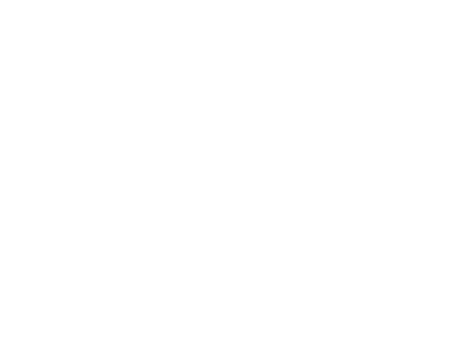

In [108]:
geoplot.pointplot(data['geometry'].boundary)

In [51]:
data_map = pd.DataFrame({"points": data['geometry'].boundary.representative_point(), "bike_level": data["happy_bike_level"]})
data_map

,points,bike_level
0,POINT (11.56789 48.14045),gemütlich
1,POINT (11.22612 48.18883),gemütlich
2,POINT (11.17547 48.20578),gemütlich
3,POINT (11.25800 48.17260),stressig
4,POINT (11.29066 48.15800),durchschnittlich
...,...,...
4452,POINT (11.45375 48.05721),gemütlich
4453,POINT (11.46576 48.11820),gemütlich
4454,POINT (11.47320 48.08212),gemütlich
4455,POINT (11.41714 48.17192),stressig


In [57]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
data_map_transformed = data_map
transformed = ohe.fit_transform(data_map[['bike_level']])
data_map_transformed[ohe.categories_[0]] = transformed.toarray()
data_map_transformed = data_map_transformed.drop(['bike_level'], axis = 1)

,points,Plan/Lücke,durchschnittlich,gemütlich,sehr stressig,stressig
0,POINT (11.56789 48.14045),0.0,0.0,1.0,0.0,0.0
1,POINT (11.22612 48.18883),0.0,0.0,1.0,0.0,0.0
2,POINT (11.17547 48.20578),0.0,0.0,1.0,0.0,0.0
3,POINT (11.25800 48.17260),0.0,0.0,0.0,0.0,1.0
4,POINT (11.29066 48.15800),0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...
4452,POINT (11.45375 48.05721),0.0,0.0,1.0,0.0,0.0
4453,POINT (11.46576 48.11820),0.0,0.0,1.0,0.0,0.0
4454,POINT (11.47320 48.08212),0.0,0.0,1.0,0.0,0.0
4455,POINT (11.41714 48.17192),0.0,0.0,0.0,0.0,1.0


In [76]:
data_map_transformed['points_x'] = data_map_transformed['points'].apply(lambda r: r.x)
data_map_transformed['points_y'] = data_map_transformed['points'].apply(lambda r: r.y)
data_map_transformed

,points,bike_level,Plan/Lücke,durchschnittlich,gemütlich,sehr stressig,stressig,points_x,points_y
0,POINT (11.56789 48.14045),gemütlich,0.0,0.0,1.0,0.0,0.0,11.567890,48.140453
1,POINT (11.22612 48.18883),gemütlich,0.0,0.0,1.0,0.0,0.0,11.226120,48.188835
2,POINT (11.17547 48.20578),gemütlich,0.0,0.0,1.0,0.0,0.0,11.175469,48.205778
3,POINT (11.25800 48.17260),stressig,0.0,0.0,0.0,0.0,1.0,11.257999,48.172600
4,POINT (11.29066 48.15800),durchschnittlich,0.0,1.0,0.0,0.0,0.0,11.290661,48.158001
...,...,...,...,...,...,...,...,...,...
4452,POINT (11.45375 48.05721),gemütlich,0.0,0.0,1.0,0.0,0.0,11.453751,48.057212
4453,POINT (11.46576 48.11820),gemütlich,0.0,0.0,1.0,0.0,0.0,11.465762,48.118198
4454,POINT (11.47320 48.08212),gemütlich,0.0,0.0,1.0,0.0,0.0,11.473203,48.082122
4455,POINT (11.41714 48.17192),stressig,0.0,0.0,0.0,0.0,1.0,11.417139,48.171924


In [84]:
data_map_transformed.pop("bike_level")
data_map_transformed.pop("points")

KeyError: 'points'

In [93]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 10, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data_map_transformed)
data_map_transformed['cluster'] = y_kmeans +1
data_map_transformed

,Plan/Lücke,durchschnittlich,gemütlich,sehr stressig,stressig,points_x,points_y,cluster
0,0.0,0.0,1.0,0.0,0.0,11.567890,48.140453,9
1,0.0,0.0,1.0,0.0,0.0,11.226120,48.188835,4
2,0.0,0.0,1.0,0.0,0.0,11.175469,48.205778,4
3,0.0,0.0,0.0,0.0,1.0,11.257999,48.172600,8
4,0.0,1.0,0.0,0.0,0.0,11.290661,48.158001,1
...,...,...,...,...,...,...,...,...
4452,0.0,0.0,1.0,0.0,0.0,11.453751,48.057212,4
4453,0.0,0.0,1.0,0.0,0.0,11.465762,48.118198,4
4454,0.0,0.0,1.0,0.0,0.0,11.473203,48.082122,4
4455,0.0,0.0,0.0,0.0,1.0,11.417139,48.171924,8


In [94]:
data_map_transformed

,Plan/Lücke,durchschnittlich,gemütlich,sehr stressig,stressig,points_x,points_y,cluster
0,0.0,0.0,1.0,0.0,0.0,11.567890,48.140453,9
1,0.0,0.0,1.0,0.0,0.0,11.226120,48.188835,4
2,0.0,0.0,1.0,0.0,0.0,11.175469,48.205778,4
3,0.0,0.0,0.0,0.0,1.0,11.257999,48.172600,8
4,0.0,1.0,0.0,0.0,0.0,11.290661,48.158001,1
...,...,...,...,...,...,...,...,...
4452,0.0,0.0,1.0,0.0,0.0,11.453751,48.057212,4
4453,0.0,0.0,1.0,0.0,0.0,11.465762,48.118198,4
4454,0.0,0.0,1.0,0.0,0.0,11.473203,48.082122,4
4455,0.0,0.0,0.0,0.0,1.0,11.417139,48.171924,8


In [117]:
# import seaborn as sns
# from matplotlib import pyplot as plt
# plt.figure(figsize=(25,25))
# sns.scatterplot(x = 'points_x', y = 'points_y', data=data_map_transformed, hue='cluster')

In [129]:
grped_by_clusters = data_map_transformed.groupby(['cluster'])["Plan/Lücke", "durchschnittlich", "gemütlich", "sehr stressig", "stressig"].aggregate(sum)
grped_by_clusters = grped_by_clusters.reset_index()

/var/folders/88/6833hk794fs37_ntf5wzz44510s0cf/T/ipykernel_14450/494116989.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grped_by_clusters = data_map_transformed.groupby(['cluster'])["Plan/Lücke", "durchschnittlich", "gemütlich", "sehr stressig", "stressig"].aggregate(sum)


In [131]:
grped_by_clusters.apply(lambda r: print(r['cluster']))

KeyError: 'cluster'

<AxesSubplot: >

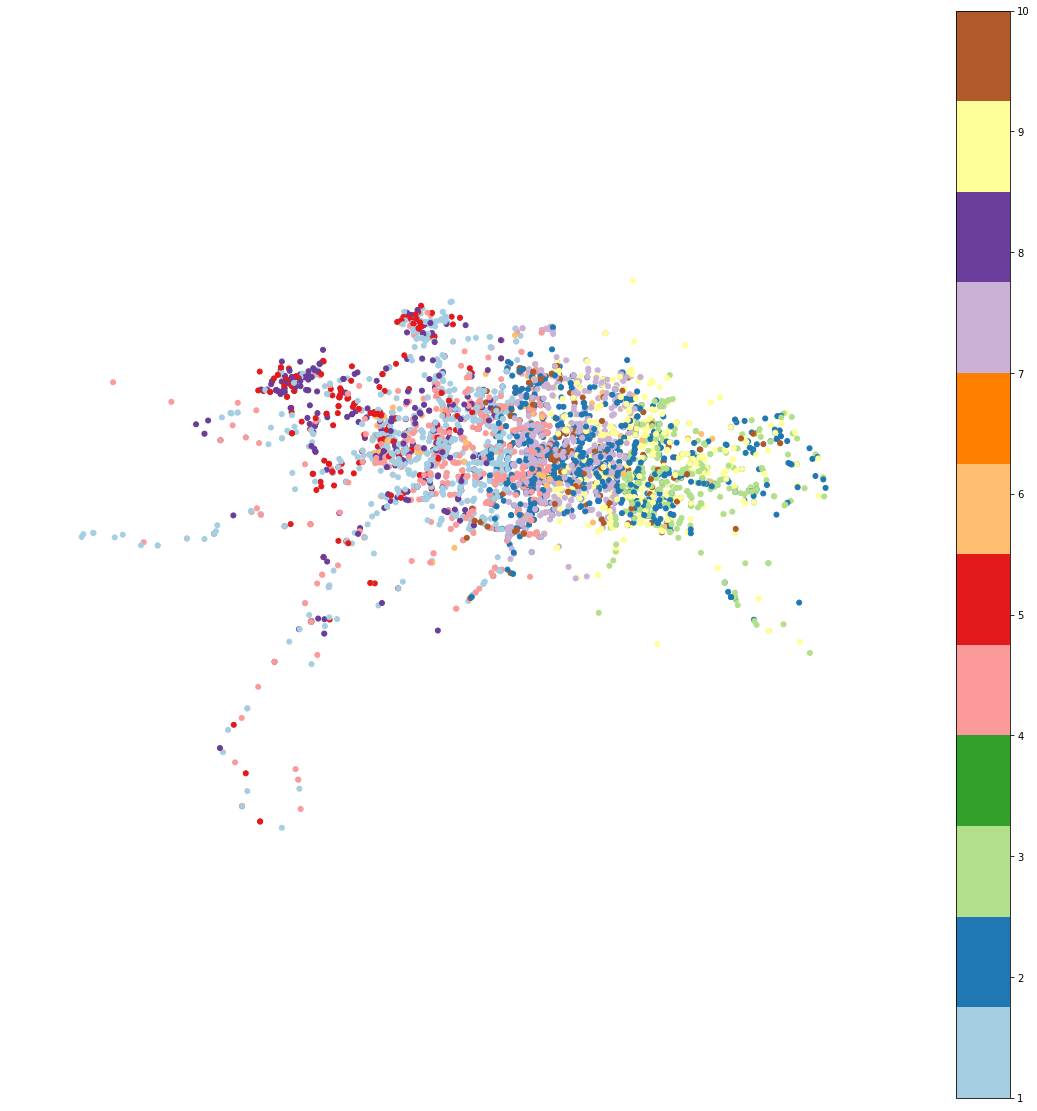

In [107]:
gdf = gpd.GeoDataFrame(
    data_map_transformed, geometry=gpd.points_from_xy(data_map_transformed["points_x"], data_map_transformed["points_y"]))
geoplot.pointplot(gdf['geometry'], hue = data_map_transformed['cluster'], legend = True, figsize = (20, 20), cmap='Paired')

/Users/abdalla/.conda/envs/mlops_env/lib/python3.8/site-packages/geoplot/geoplot.py:1459: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in path:


<AxesSubplot: >

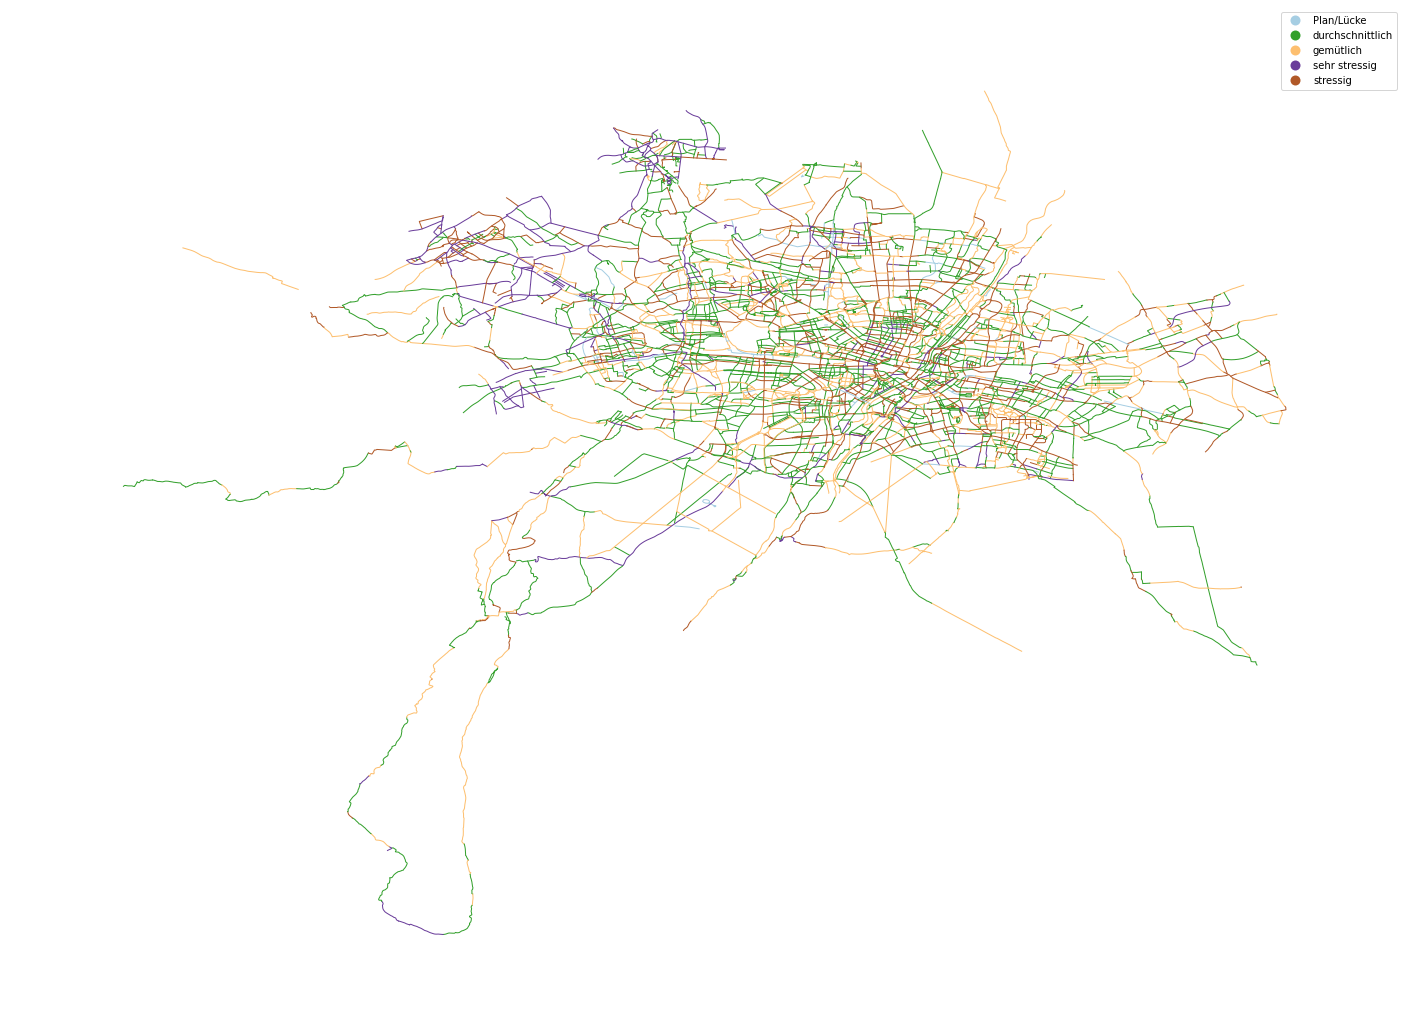

In [12]:
geoplot.sankey(data['geometry'], hue = data['happy_bike_level'], legend = True, figsize = (25, 25), cmap='Paired')

In [13]:
merged_data = pd.merge(data, districts, left_on="bezirk_nummer", right_on="bezirk_nummer").drop('bezirk_nummer', axis=1)

In [14]:
merged_data.columns

Index(['cartodb_id_x', 'strassenansicht_klick_mich', 'name_x', 'strecke',
       'mw_rv_strecke', 'ist_situation', 'happy_bike_level', 'soll_massnahmen',
       'massnahmen_kategorie_link', 'beschreibung', 'munichways_id',
       'status_umsetzung', 'bezirk_link', 'links_x', 'netztyp',
       'plan_netztyp_id', 'farbe', 'rsv_strecke', 'alternative', 'viel_kfz',
       'bild', 'mapillary_link', 'mapillary_img_id', 'bezirk_region_x',
       'bezirk_name', 'massnahmen_kategorie', 'massnahmen_blatt',
       'massnahmen_index', 'prio_gesamt', 'neuralgischer_punkt',
       'kategorie_id', 'status_id', 'netztyp_id', 'status_netzplanung',
       'rsv_boolean', 'netztyp_plan', 'netztyp_plan_id', 'netztyp_ziel',
       'netztyp_ziel_id', 'last_updated', 'geometry_x', 'cartodb_id_y',
       'name_y', 'description', 'bezirk_region_y', 'farbstufe',
       'modal_rad_2017', 'links_y', 'geometry_y'],
      dtype='object')

/Users/abdalla/.conda/envs/mlops_env/lib/python3.8/site-packages/geoplot/geoplot.py:1459: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in path:


<AxesSubplot: >

/Users/abdalla/.conda/envs/mlops_env/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/abdalla/.conda/envs/mlops_env/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


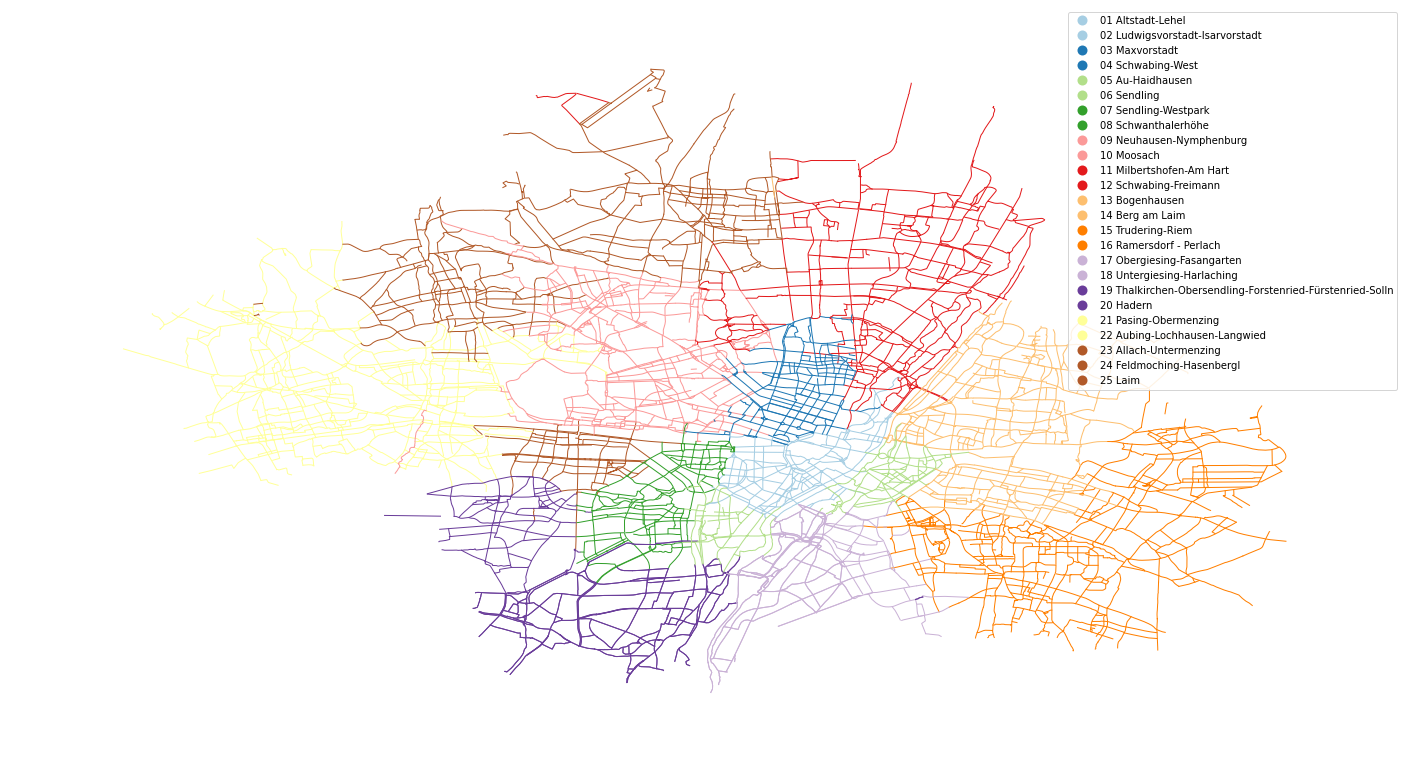

In [15]:
geoplot.sankey(merged_data['geometry_x'], hue = merged_data['name_y'], legend = True, figsize = (25, 25), cmap='Paired')

In [16]:
merged_data['happy_bike_level'].unique()

array(['gemütlich', 'Plan/Lücke', 'stressig', 'sehr stressig',
       'durchschnittlich'], dtype=object)

In [37]:
grped_data = merged_data.groupby(['name_y', 'happy_bike_level'])['happy_bike_level'].aggregate(['count']).groupby('name_y').idxmax()
grped_data

,count
name_y,
01 Altstadt-Lehel,"(01 Altstadt-Lehel, stressig)"
02 Ludwigsvorstadt-Isarvorstadt,"(02 Ludwigsvorstadt-Isarvorstadt, durchschnitt..."
03 Maxvorstadt,"(03 Maxvorstadt, durchschnittlich)"
04 Schwabing-West,"(04 Schwabing-West, durchschnittlich)"
05 Au-Haidhausen,"(05 Au-Haidhausen, durchschnittlich)"
06 Sendling,"(06 Sendling, durchschnittlich)"
07 Sendling-Westpark,"(07 Sendling-Westpark, durchschnittlich)"
08 Schwanthalerhöhe,"(08 Schwanthalerhöhe, durchschnittlich)"
09 Neuhausen-Nymphenburg,"(09 Neuhausen-Nymphenburg, durchschnittlich)"


In [77]:
grped_data[grped_data['count'] == grped_data.groupby(['name_y'])['count']]

/Users/abdalla/.conda/envs/mlops_env/lib/python3.8/site-packages/pandas/core/computation/expressions.py:70: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return op(a, b)


,,count
name_y,happy_bike_level,


In [38]:
merged_data

,cartodb_id_x,strassenansicht_klick_mich,name_x,strecke,mw_rv_strecke,ist_situation,happy_bike_level,soll_massnahmen,massnahmen_kategorie_link,beschreibung,...,last_updated,geometry_x,cartodb_id_y,name_y,description,bezirk_region_y,farbstufe,modal_rad_2017,links_y,geometry_y
0,4667,"<a href=""https://www.mapillary.com/map/im/8395...",Lenbachplatz (Maxburgstr. bis Pacellistr.),Altstadt-RadlRing,Premium,"breiter Radweg (2,5 m) - viel Kfz/Lärm/Schadst...",gemütlich,geschützter breiter Radweg getrennt von Kfz un...,"<a href=""https://github.com/MunichWays/bike-in...","Der erste grün eingefärbte Radweg Münchens, Fe...",...,2022-11-13 19:03:50+00:00,"LINESTRING (11.56914 48.14087, 11.56900 48.140...",1,01 Altstadt-Lehel,None,LHM-Mitte,1,29,"<a href=""https://www.munichways.com/bezirksaus...","MULTIPOLYGON (((11.56483 48.13638, 11.56514 48..."
1,4203,"<a href=""https://www.mapillary.com/map/im/2227...",Sonnenstraße_Elisenstraße-Lenbachplatz,Altstadt-RadlRing|-|Nicht-MW-Ist,-,fehlende Querungsmöglichkeit am Lenbachplatz v...,Plan/Lücke,Fuß-Radweg Ampel - Lücke schließen,"<a href=""https://github.com/MunichWays/bike-in...",-,...,2022-11-13 19:03:50+00:00,"LINESTRING (11.56683 48.14022, 11.56695 48.140...",1,01 Altstadt-Lehel,None,LHM-Mitte,1,29,"<a href=""https://www.munichways.com/bezirksaus...","MULTIPOLYGON (((11.56483 48.13638, 11.56514 48..."
2,4199,"<a href=""https://www.mapillary.com/map/im/1418...",Isartorplatz (Richtung Thomas-Wimmer-Ring),Altstadt-RadlRing,Premium,sehr schmaler Radweg - uneben - linksabbiegen ...,stressig,sicheres und zeitgemäßes Kreuzungsdesign nach ...,"<a href=""https://github.com/MunichWays/bike-in...",Tal / Isartorplatz Anschluss RV8E - Panoramara...,...,2022-11-13 19:03:50+00:00,"LINESTRING (11.58302 48.13388, 11.58297 48.134...",1,01 Altstadt-Lehel,None,LHM-Mitte,1,29,"<a href=""https://www.munichways.com/bezirksaus...","MULTIPOLYGON (((11.56483 48.13638, 11.56514 48..."
3,3523,"<a href=""https://www.mapillary.com/map/im/H3Aw...",Paradiesstraße (Querung Widenmayerstr.),-n/a-Alle-Wege,-,kein Radweg - viel Kfz/Lärm/Schadstoffe - fehl...,sehr stressig,sicher Kreuzung,"<a href=""https://github.com/MunichWays/bike-in...",keine Anschluss an den Isarradweg,...,2022-11-13 19:03:50+00:00,"LINESTRING (11.59550 48.14648, 11.59581 48.14646)",1,01 Altstadt-Lehel,None,LHM-Mitte,1,29,"<a href=""https://www.munichways.com/bezirksaus...","MULTIPOLYGON (((11.56483 48.13638, 11.56514 48..."
4,3522,"<a href=""https://www.mapillary.com/map/im/QEwe...",Paradiesstraße,-n/a-Alle-Wege,-,kein Radweg - wenig Kfz/Lärm/Schadstoffe - Bet...,stressig,Fahrradstraße mit gleichberechtigter Ampelscha...,"<a href=""https://github.com/MunichWays/bike-in...",Einzige Möglichkeit zur Unterführung Dianastr.,...,2022-11-13 19:03:50+00:00,"LINESTRING (11.59543 48.14648, 11.59474 48.146...",1,01 Altstadt-Lehel,None,LHM-Mitte,1,29,"<a href=""https://www.munichways.com/bezirksaus...","MULTIPOLYGON (((11.56483 48.13638, 11.56514 48..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3700,107,"<a href=""https://www.mapillary.com/map/im/MzkD...",Hochleite (ab Josef-Humar-Str.),Isartalbahnweg-Sauerlach,Premium,-,gemütlich,intuitive Wegeführung mit durchgehend eingefär...,"<a href=""https://github.com/MunichWays/bike-in...",-,...,2022-11-13 19:03:50+00:00,"MULTILINESTRING ((11.55339 48.09314, 11.55240 ...",18,18 Untergiesing-Harlaching,None,LHM-Süd,4,23,"<a href=""https://www.munichways.com/bezirksaus...","MULTIPOLYGON (((11.54133 48.07789, 11.54237 48..."
3701,105,"<a href=""https://www.mapillary.com/map/im/9G_m...",Schilcherweg (Querung Geiselgasteigstr. ),Isartalbahnweg-Sauerlach,Premium,Querung der Landstraße ohne Ampel,stressig,sichere Querung - Ampelanlage,"<a href=""https://github.com/MunichWays/bike-in...",-,...,2022-11-13 19:03:50+00:00,"MULTILINESTRING ((11.54770 48.07151, 11.54752 ...",19,18 Untergiesing-Harlaching,None,LHM-Süd,4,23,"<a href=""https://www.munichways.com/bezirksaus...","MULTIPOLYGON (((

In [2]:
# geoplot.polyplot(data['geometry'].head(), projection=gcrs.AlbersEqualArea(), edgecolor='darkgrey', facecolor='lightgrey', linewidth=.3,
#     figsize=(12, 8))

In [10]:
data

,cartodb_id,name,description,bezirk_nummer,bezirk_region,farbstufe,modal_rad_2017,links,geometry
0,19,18 Untergiesing-Harlaching,None,BA18,LHM-Süd,4,23,"<a href=""https://www.munichways.com/bezirksaus...","MULTIPOLYGON (((11.55607 48.07994, 11.55695 48..."
1,21,19 Thalkirchen-Obersendling-Forstenried-Fürste...,None,BA19,LHM-Süd,5,15,"<a href=""https://www.munichways.com/bezirksaus...","MULTIPOLYGON (((11.49023 48.07382, 11.49030 48..."
2,16,16 Ramersdorf - Perlach,None,BA16,LHM-Ost,2,13,"<a href=""https://www.munichways.com/bezirksaus...","MULTIPOLYGON (((11.59525 48.11516, 11.59537 48..."
3,2,02 Ludwigsvorstadt-Isarvorstadt,None,BA02,LHM-Mitte,10,23,"<a href=""https://www.munichways.com/bezirksaus...","MULTIPOLYGON (((11.54420 48.12637, 11.54421 48..."
4,15,15 Trudering-Riem,None,BA15,LHM-Ost,10,17,"<a href=""https://www.munichways.com/bezirksaus...","MULTIPOLYGON (((11.64369 48.11508, 11.64913 48..."
5,17,17 Obergiesing-Fasangarten,None,BA17,LHM-Ost,7,11,"<a href=""https://www.munichways.com/bezirksaus...","MULTIPOLYGON (((11.57369 48.11221, 11.57380 48..."
6,18,18 Untergiesing-Harlaching,None,BA18,LHM-Süd,4,23,"<a href=""https://www.munichways.com/bezirksaus...","MULTIPOLYGON (((11.54133 48.07789, 11.54237 48..."
7,20,19 Thalkirchen-Obersendling-Forstenried-Fürste...,None,BA19,LHM-Süd,5,15,"<a href=""https://www.munichways.com/bezirksaus...","MULTIPOLYGON (((11.47092 48.08319, 11.47326 48..."
8,23,21 Pasing-Obermenzing,None,BA21,LHM-West,4,19,"<a href=""https://www.munichways.com/bezirksaus...","MULTIPOLYGON (((11.43293 48.16303, 11.43725 48..."
9,24,22 Aubing-Lochhausen-Langwied,None,BA22,LHM-West,6,7,"<a href=""https://www.munichways.com/bezirksaus...","MULTIPOLYGON (((11.36078 48.15807, 11.36104 48..."
